# ***TRABAJO PRÁCTICO INTEGRADOR 2024***
Autores: Baez María Lucia, Nogueira Guadalupe, Sampayo Melanie, Svriz Levato Florencia



En este trabajo práctico se utilizó el dataset "Student Performance Factors", para realizar un análisis y ver el rendimiento de los estudiantes según distintos factores que influyen en su desempeño academico.


https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data


Para comenzar se carga un archivo de datos en formato CSV utilizando la librería Pandas. Luego, el código valida las filas del archivo utilizando el modelo de validación definido con Pydantic, una librería especializada en la validación de datos basada en modelos de clases. Se seleccionó la variable objetivo : "Exam Score", y las variables de interes: "Hours_Studied", "Sleep_Hours" y "Motivation_Level".

Después, se valida cada fila con el modelo de Pydantic para asegurarse de que todos los datos sean correctos. Si los datos son válidos, se convierten en un diccionario y se almacenan en una nueva lista de registros válidos. Las filas válidas e inválidas se guardan en dos archivos CSV diferentes: Valid_StudentPerformanceFactors.csv y Invalid_StudentPerformanceFactors.csv.

Finalmente, el código imprime cuántas filas fueron consideradas válidas y cuántas fueron inválidas.

In [ ]:
!pip install pandas

import pandas as pd
from pydantic import BaseModel, Field
from typing import Optional

file_path = '/content/StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)

variables_interes = ['Exam_Score', 'Hours_Studied', 'Sleep_Hours', 'Motivation_Level']

class StudentPerformance(BaseModel):
    Hours_Studied: int = Field(ge=0, le=100)
    Sleep_Hours: int = Field(ge=0, le=124)
    Exam_Score: int = Field(ge=0, le=100)
    Motivation_Level: Optional[str] = None

valid_mask = (
    (df['Hours_Studied'].between(0, 100)) &
    (df['Sleep_Hours'].between(0, 24)) &
    (df['Exam_Score'].between(0, 100)) &
    (df['Motivation_Level'].isin(['Low', 'Medium', 'High']))
)

valid_df = df[valid_mask]
invalid_df = df[~valid_mask]

valid_records = []
for _, row in valid_df.iterrows():
    student = StudentPerformance.parse_obj(row.to_dict())
    valid_records.append(student.dict())

valid_df = pd.DataFrame(valid_records)

valid_df.to_csv('Valid_StudentPerformanceFactors.csv', index=False)
invalid_df.to_csv('Invalid_StudentPerformanceFactors.csv', index=False)

print("Validación completada.")
print(f"Número de filas válidas: {len(valid_df)}")
print(f"Número de filas inválidas: {len(invalid_df)}")



FileNotFoundError: [Errno 2] No such file or directory: '/content/StudentPerformanceFactors.csv'

Calculamos las estadisticas descriptivas de cada variable para conocer el comportamiento y la distribución de tus datos



In [ ]:
descriptivo = valid_df.describe()
print("Estadísticas descriptivas:")
print(descriptivo)

Estadísticas descriptivas:
       Hours_Studied  Sleep_Hours   Exam_Score
count    6606.000000  6606.000000  6606.000000
mean       19.974266     7.029216    67.230548
std         5.990424     1.468177     3.868502
min         1.000000     4.000000    55.000000
25%        16.000000     6.000000    65.000000
50%        20.000000     7.000000    67.000000
75%        24.000000     8.000000    69.000000
max        44.000000    10.000000   100.000000


Se genera un histograma para visualizar la distribución de los puntajes de examen (Exam_Score) en el dataset valid_df, con barras que representan la frecuencia de los diferentes rangos de puntajes. Además, incluye etiquetas en los ejes, un título y una cuadrícula para facilitar la lectura de los datos.

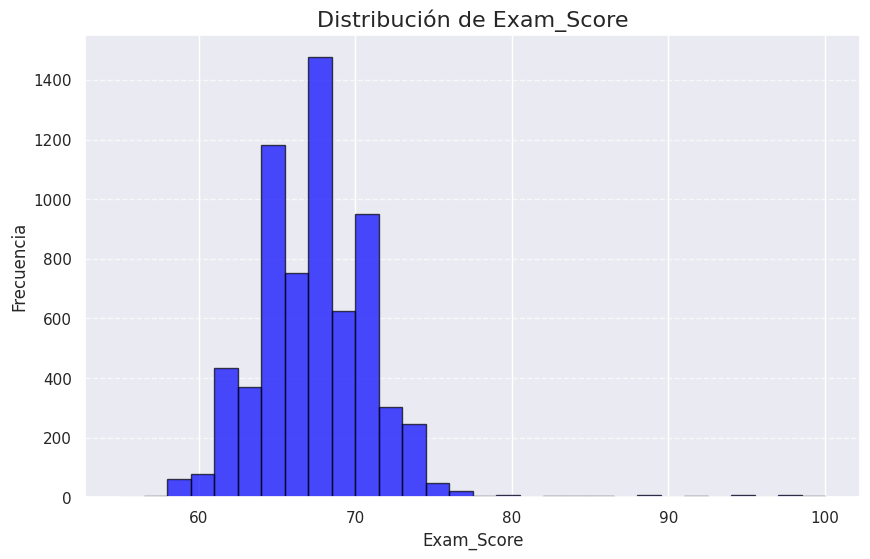

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(valid_df['Exam_Score'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución de Exam_Score', fontsize=16)
plt.xlabel('Exam_Score', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Se creó  un gráfico de dispersión (scatter plot) para visualizar la relación entre las horas de estudio (Hours_Studied) y los puntajes del examen (Exam_Score) en el dataset, y otro entre las horas de sueño(Sleep_Hours) y los puntajes obtenidos(Exam_Score), permitiendo identificar patrones o tendencias en los datos.

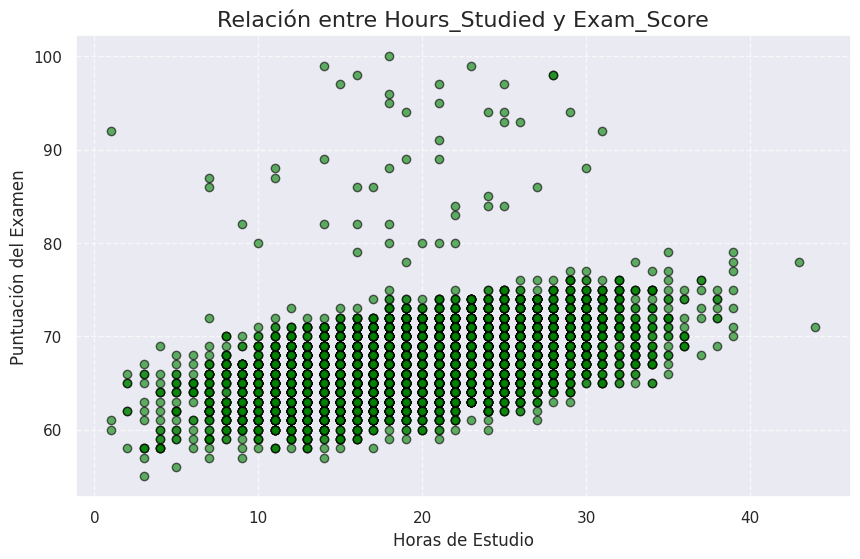

In [ ]:
# Relación entre Exam_Score y Hours_Studied

plt.figure(figsize=(10, 6))
plt.scatter(valid_df['Hours_Studied'], valid_df['Exam_Score'], color='green', alpha=0.6, edgecolors='black')
plt.title('Relación entre Hours_Studied y Exam_Score', fontsize=16)
plt.xlabel('Horas de Estudio', fontsize=12)
plt.ylabel('Puntuación del Examen', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

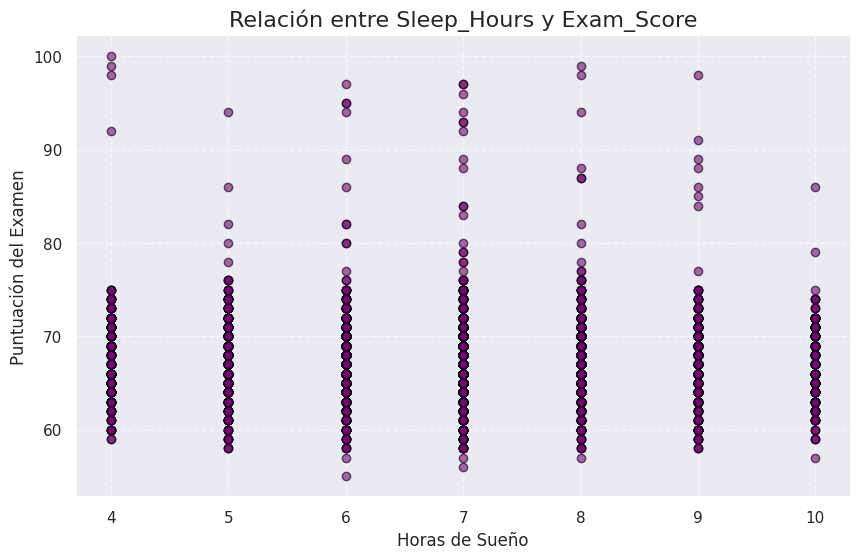

In [ ]:
# Relación entre Exam_Score y Sleep_Hours
plt.figure(figsize=(10, 6))
plt.scatter(valid_df['Sleep_Hours'], valid_df['Exam_Score'], color='purple', alpha=0.6, edgecolors='black')
plt.title('Relación entre Sleep_Hours y Exam_Score', fontsize=16)
plt.xlabel('Horas de Sueño', fontsize=12)
plt.ylabel('Puntuación del Examen', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Se logra interpretar en el primer gráfico que las notas de los estudiantes se concentran entre un puntaje de 60 y 70. En los gráficos de dispersión esta concentración es notoria lo que conlleva a que no haya una correlación entre las variables, ya que los campos de interés tienen un rango amplio de valores. Esto nos permite deducir que mayor cantidad de sueño no garantiza un mayor rendimiento en los examenes.

Se creó una serie "Desempeño" como nueva columna categorica del dataset y se clasificaron los puntajes "Exam Score" entre valores altos, medios y bajos.

In [ ]:
# Clasificación del rendimiento académico en una nueva columna
def clasificar_desempeno(score):
    if score >= 85:
        return 'Alto'
    elif score >= 65:
        return 'Medio'
    else:
        return 'Bajo'

valid_df['Desempeño'] = valid_df['Exam_Score'].apply(clasificar_desempeno)

In [ ]:
# Mostrar los primeros registros para verificar la nueva columna
print("Primera fila con la nueva clasificación de desempeño:")
print(valid_df[['Exam_Score', 'Desempeño']].head())

Primera fila con la nueva clasificación de desempeño:
   Exam_Score Desempeño
0          67     Medio
1          61      Bajo
2          74     Medio
3          71     Medio
4          70     Medio


Se calculó la cantidad de estudiantes por categoria de desempeño, demostrando que la consentración esta entre el 60 y 70 puntos, con una media de 67 puntos.

In [ ]:
cantidad_estudiantes_desempeno = valid_df['Desempeño'].value_counts()

print("Cantidad de estudiantes por categoría de desempeño:")
print(cantidad_estudiantes_desempeno)

Cantidad de estudiantes por categoría de desempeño:
Desempeño
Medio    5120
Bajo     1452
Alto       34
Name: count, dtype: int64


Gráfico de los resultados

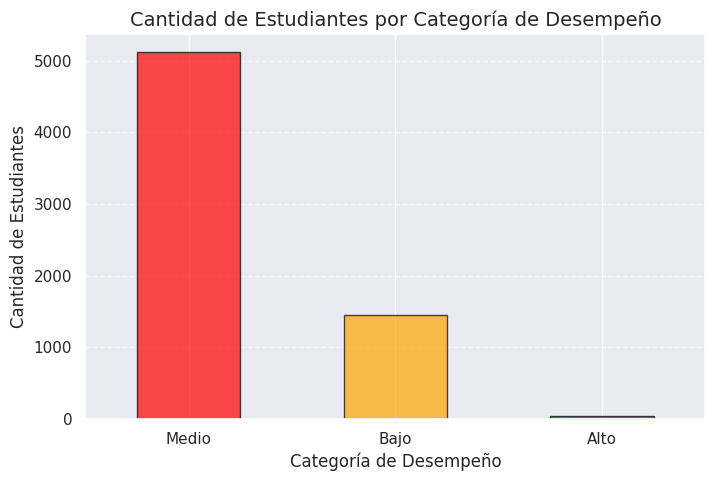

In [ ]:
plt.figure(figsize=(8, 5))
cantidad_estudiantes_desempeno.plot(kind='bar', color=['red', 'orange', 'green'], alpha=0.7, edgecolor='black')
plt.title('Cantidad de Estudiantes por Categoría de Desempeño', fontsize=14)
plt.xlabel('Categoría de Desempeño', fontsize=12)
plt.ylabel('Cantidad de Estudiantes', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Para finalizar se quizo analizar el nivel de motivación de los estudiantes, calculando la cantidad de niveles y su porcentaje sobre el total.

In [ ]:
num_categorias = valid_df['Motivation_Level'].nunique()

print(f'Número de categorías de motivación en los estudiantes: {num_categorias}')

porcentaje_motivaciones = valid_df['Motivation_Level'].value_counts(normalize=True) * 100

print(round(porcentaje_motivaciones,2))

Número de categorías de motivación en los estudiantes: 3
Motivation_Level
Medium    50.73
Low       29.31
High      19.97
Name: proportion, dtype: float64
